In [12]:
!pip install cellpose --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [14]:
import cellpose

# Load your normalized image
img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_H_tiles\246_41_H_test_2.tif')

# Run cell segmentation
masks, flows, styles = cellpose.models.Cellpose(img=img, model_type='cyto')

# Analyze the masks (e.g., count objects, measure properties)
cell_count = np.count_nonzero(masks[0])  # Count number of foreground pixels
print(f"Number of detected nuclei: {cell_count}")

# Optionally visualize the results
cellpose.show(img, masks, flows=flows, styles=styles)


OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\cheukjy\AppData\Roaming\Python\Python311\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.

In [ ]:
!pip install stardist
!pip install imagecodecs
!pip install --upgrade cryptography
# got error: 
# ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
# pyopenssl 24.0.0 requires cryptography<43,>=41.0.5, but you have cryptography 43.0.0 which is incompatible.
!pip install --upgrade pyopenssl
# must upgrade pyopenssl

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread, imsave
from csbdeep.utils import Path, normalize
from csbdeep.utils.tf import keras_import
keras = keras_import()

from stardist import export_imagej_rois, random_label_cmap
from stardist.models import StarDist2D

np.random.seed(0)
cmap = random_label_cmap()

In [14]:
img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_normalized_tiles\182_72_norm.tif')

img.shape


(256, 256, 3)

In [16]:
img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2.svs')

img.shape

MemoryError: Unable to allocate 19.3 GiB for an array with shape (1, 1, 80708, 85679, 3) and data type uint8

In [126]:
# Get image
# from imageio import imread
# test_image_path = "C:\Users\cheukjy\WC25_LLEDGE2_test\Test_normalized_tiles\182_72_norm.tif"
# test_img = imread(test_image_path)

# print(test_img)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2360363343.py, line 3)

In [18]:
import cv2 
from skimage.filters import sobel



# img = cv2.imread("WC25_LLEDGE2.tif",0) 
# img2= sobel(img)
# # the slash is folder name, and the name after the thing is 
# # the number at the end here changes whether or not you have color. 1 is color; 0 is no color
# cv2.imshow("abc",img)
# cv2.imshow("edge",img2)

# ## in imshow(_name_,img) the _name_ is the name of the windows that pops out
# print(img.shape)

# cv2.waitKey(0)
# cv2.destroyAllWindows() 

In [ ]:
########## LOOK AT ACCURACY FOR EACH IMAGE USING THESE SETTINGS ##############

In [ ]:
################## ORIGINAL ONLY ################

Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of detected nuclei: 75


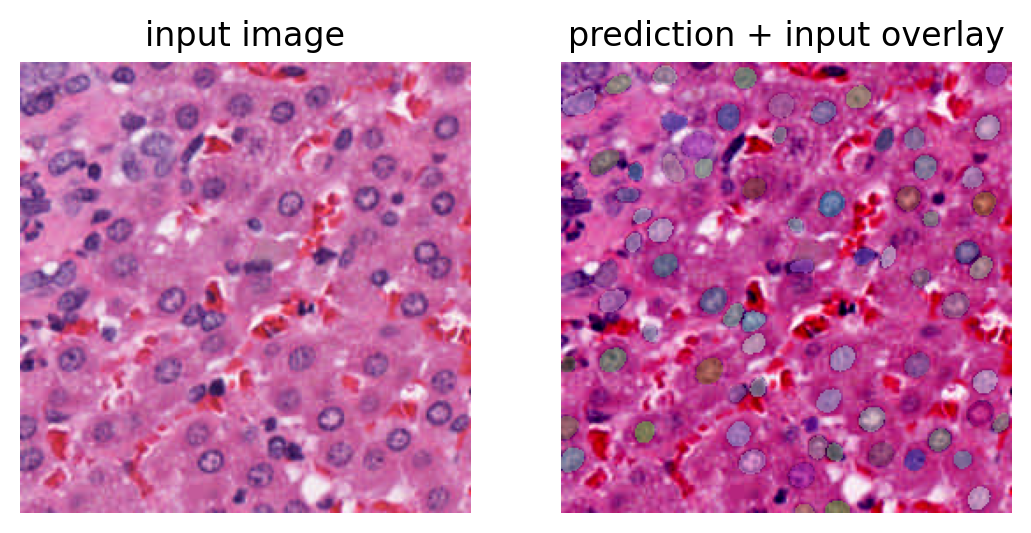

In [42]:
img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_end_directory_original_files\246_41_orig_test_2.tif')
# 
# img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_end_directory_original_files\246_39_orig_test_2.tif')
#
# img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_end_directory_original_files\282_39_orig_test_2.tif')
# 
# img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_end_directory_original_files\258_32_orig_test_2.tif')

# Make model
from stardist.models import StarDist2D
model = StarDist2D.from_pretrained('2D_versatile_he')

# img = cv2.imread("WC25_LLEDGE2_test\Test_2_H_tiles\246_41_H_test_2.tif",0) 
# cv2.waitKey(0)
# cv2.destroyAllWindows() 

img2= sobel(img)
# the slash is folder name, and the name after the thing is 
# the number at the end here changes whether or not you have color. 1 is color; 0 is no color

# Make predictions (labels)
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

prob_thresh = None # check on this 
nms_thresh = None

labels, _ = model.predict_instances(normalize(img), scale = 1.2,
                                    prob_thresh=prob_thresh, 
                                    nms_thresh=nms_thresh)

# Plot
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img)) # in img=img make it greyscale 
plt.axis("off")
plt.title("prediction + input overlay")

# count the different cells you find 
cell_count = len(np.unique(labels)) - 1

print(f"Number of detected nuclei: {cell_count}")


    label   area  equivalent_diameter  mean_intensity-0  mean_intensity-1  \
0       1  172.0            14.798554        147.459302        130.122093   
1       2  137.0            13.207340        127.510949        108.656934   
2       3  145.0            13.587484        141.393103        123.131034   
3       4  159.0            14.228320        132.603774        113.018868   
4       5  164.0            14.450304        147.823171        131.213415   
..    ...    ...                  ...               ...               ...   
80     81   74.0             9.706685        173.337838        158.540541   
81     82   67.0             9.236182        117.358209        101.253731   
82     83   68.0             9.304853        156.323529        139.220588   
83     84   51.0             8.058239        127.117647        108.254902   
84     85   79.0            10.029253        178.886076        165.050633   

    mean_intensity-2  solidity  
0         167.691860  0.960894  
1        

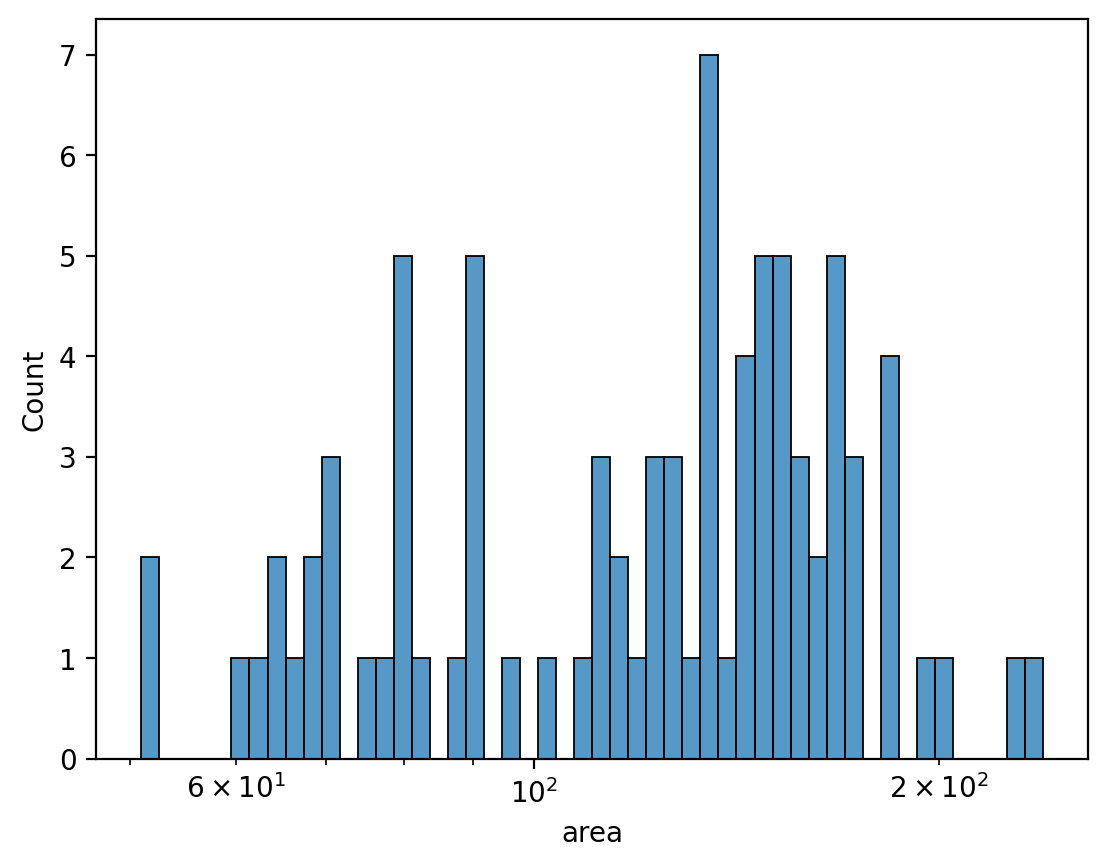

In [49]:

from skimage.measure import regionprops_table # region props tables helps you look at it in a pandas dataframe
import pandas as pd #

props = regionprops_table(labels, img, 
                          properties=['label',
                                      'area', 'equivalent_diameter',
                                      'mean_intensity', 'solidity']) # the you can extract are subjective to the the code 

analysis_results = pd.DataFrame(props)
# print(analysis_results.tail())
# print(pd.analysis_results)
# df = pd.read(analysis_results)

print(analysis_results)

# plot your results on a chart
# the code's output are in pixels...
import seaborn as sns

sns.histplot(x="area", data=analysis_results, bins=50, log_scale=True) 

# export to excel file
# Export to Excel file named 'analysis_results.xlsx' (excluding the index column)
filename = "TEST_246_41_H_test_2_analysis_results.xlsx"
analysis_results.to_excel(filename)
# excel file will move to the folder your jupyternotebook is attached to. 


In [ ]:
######################## CHANGING THE SCALE TO MEASURE ACCURACY OF ONE ##########################

In [ ]:
####################### MAKING SURE YOU COMPARE ORIG, NORMAL, H ONLY ##############################

Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of detected nuclei: 82


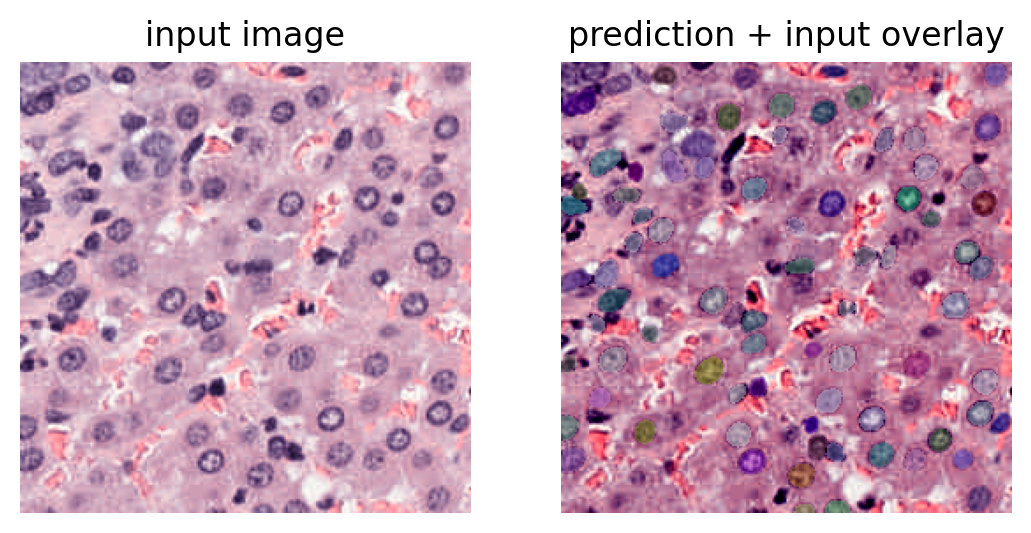

In [64]:
img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_Normalized_tiles\246_41_norm_test_2.tif')
# 
# img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_Normalized_tiles\246_39_norm_test_2.tif')
#
# img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_Normalized_tiles\282_39_norm_test_2.tif')
# 
# img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_Normalized_tiles\258_32_norm_test_2.tif')

# Make model
from stardist.models import StarDist2D
model = StarDist2D.from_pretrained('2D_versatile_he')

# img = cv2.imread("WC25_LLEDGE2_test\Test_2_H_tiles\246_41_H_test_2.tif",0) 
# cv2.waitKey(0)
# cv2.destroyAllWindows() 

img2= sobel(img)
# the slash is folder name, and the name after the thing is 
# the number at the end here changes whether or not you have color. 1 is color; 0 is no color

# Make predictions (labels)
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

prob_thresh = None # check on this 
nms_thresh = None

labels, _ = model.predict_instances(normalize(img), scale = 1.2,
                                    prob_thresh=prob_thresh, 
                                    nms_thresh=nms_thresh)

# Plot
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img)) # in img=img make it greyscale 
plt.axis("off")
plt.title("prediction + input overlay")

# count the different cells you find 
cell_count = len(np.unique(labels)) - 1

print(f"Number of detected nuclei: {cell_count}")


In [ ]:
##### normalized ########

Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of detected nuclei: 82


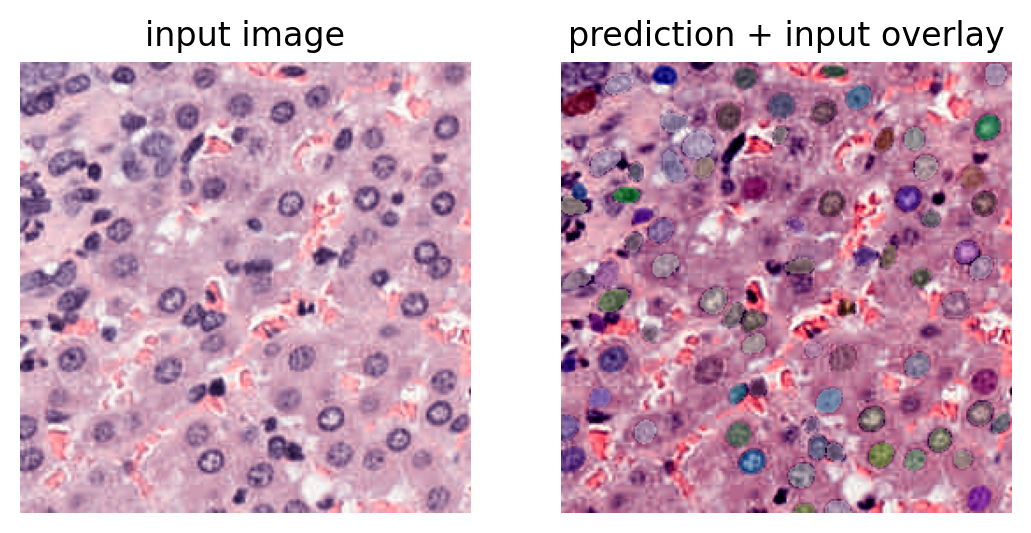

In [54]:
img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_Normalized_tiles\246_41_norm_test_2.tif')
# 
# img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_Normalized_tiles\246_39_norm_test_2.tif')
#
# img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_Normalized_tiles\282_39_norm_test_2.tif')
# 
# img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_Normalized_tiles\258_32_norm_test_2.tif')

# Make model
from stardist.models import StarDist2D
model = StarDist2D.from_pretrained('2D_versatile_he')

# img = cv2.imread("WC25_LLEDGE2_test\Test_2_H_tiles\246_41_H_test_2.tif",0) 
# cv2.waitKey(0)
# cv2.destroyAllWindows() 

img2= sobel(img)
# the slash is folder name, and the name after the thing is 
# the number at the end here changes whether or not you have color. 1 is color; 0 is no color

# Make predictions (labels)
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

prob_thresh = None # check on this 
nms_thresh = None

labels, _ = model.predict_instances(normalize(img), scale = 1.2,
                                    prob_thresh=prob_thresh, 
                                    nms_thresh=nms_thresh)

# Plot
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img)) # in img=img make it greyscale 
plt.axis("off")
plt.title("prediction + input overlay")

# count the different cells you find 
cell_count = len(np.unique(labels)) - 1

print(f"Number of detected nuclei: {cell_count}")


In [ ]:
##### H ONLY #####

Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Number of detected nuclei: 85


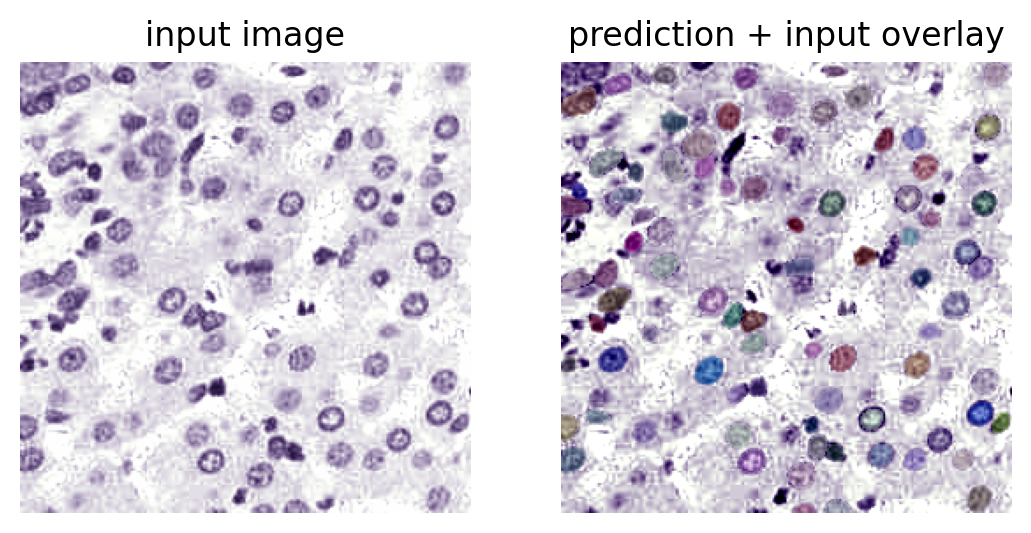

In [68]:
img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_H_tiles\246_41_H_test_2.tif')
# 
# img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_H_tiles\246_39_H_test_2.tif')
#
# img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_H_tiles\282_39_H_test_2.tif')
# 
# img = imread(r'C:\Users\cheukjy\WC25_LLEDGE2_test\Test_2_H_tiles\258_32_H_test_2.tif')

# Make model
from stardist.models import StarDist2D
model = StarDist2D.from_pretrained('2D_versatile_he')

# img = cv2.imread("WC25_LLEDGE2_test\Test_2_H_tiles\246_41_H_test_2.tif",0) 
# cv2.waitKey(0)
# cv2.destroyAllWindows() 

img2= sobel(img)
# the slash is folder name, and the name after the thing is 
# the number at the end here changes whether or not you have color. 1 is color; 0 is no color

# Make predictions (labels)
from stardist.plot import render_label
from csbdeep.utils import normalize
import matplotlib.pyplot as plt

prob_thresh = None # check on this 
nms_thresh = None

labels, _ = model.predict_instances(normalize(img), scale = 1.2,
                                    prob_thresh=prob_thresh, 
                                    nms_thresh=nms_thresh)

# Plot
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis("off")
plt.title("input image")

plt.subplot(1,2,2)
plt.imshow(render_label(labels, img=img)) # in img=img make it greyscale 
plt.axis("off")
plt.title("prediction + input overlay")

# count the different cells you find 
cell_count = len(np.unique(labels)) - 1

print(f"Number of detected nuclei: {cell_count}")


In [29]:
##########################################################################################################

In [86]:
model = StarDist2D.from_pretrained('2D_versatile_he')

help(model.predict_instances_big) 


Found model '2D_versatile_he' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.692478, nms_thresh=0.3.
Help on method predict_instances_big in module stardist.models.base:

predict_instances_big(img, axes, block_size, min_overlap, context=None, labels_out=None, labels_out_dtype=<class 'numpy.int32'>, show_progress=True, **kwargs) method of stardist.models.model2d.StarDist2D instance
    Predict instance segmentation from very large input images.
    
    Intended to be used when `predict_instances` cannot be used due to memory limitations.
    This function will break the input image into blocks and process them individually
    via `predict_instances` and assemble all the partial results. If used as intended, the result
    should be the same as if `predict_instances` was used directly on the whole image.
    
    **Important**: The crucial assumption is that all predicted object instances 

In [90]:
labels, polys = model.predict_instances_big(img, axes='YXC', block_size= 256, min_overlap=128, context=94,
                                            n_tiles=(1,1,1))

show_image(labels, cmap=cmap)
# comtains the labels of the image that looks like the large plot and it will give the nuclei segmentation 

effective: block_size=(256, 256, 3), min_overlap=(128, 128, 0), context=(96, 96, 0)


AssertionError: 

In [16]:
def show_image(img, **kwargs):
    """Plot large image at different resolutions."""
    fig, ax = plt.subplots(2,4, figsize=(16,8))
    mid = [s//2 + 600 for s in img.shape[:2]]
    for a,t,u in zip(ax.ravel(),[1,2,4,8,16,32,64,128],[16,8,4,2,1,1,1,1]):
        sl = tuple(slice(c - s//t//2, c + s//t//2, u) for s,c in zip(img.shape[:2],mid))
        a.imshow(img[sl], **kwargs)
        a.axis('off')
    plt.tight_layout()
    plt.show()


In [70]:
# pic = 'C:\Users\cheukjy\WC25_LLEDGE2.svs'
# img = imread(r'C:/Users/cheukjy/WC25_LLEDGE2.svs')

MemoryError: Unable to allocate 19.3 GiB for an array with shape (1, 1, 80708, 85679, 3) and data type uint8

In [74]:
import openslide
from PIL import Image

ModuleNotFoundError: Couldn't locate OpenSlide DLL.  Did you call os.add_dll_directory()?  https://openslide.org/api/python/#installing

In [72]:
from tifffile import imread

img = imread('path_to_file.svs')

MemoryError: Unable to allocate 19.3 GiB for an array with shape (1, 1, 80708, 85679, 3) and data type uint8

In [76]:
import openslide
from PIL import Image

# Open the .svs file
slide = openslide.OpenSlide(r'C:/Users/cheukjy/WC25_LLEDGE2.svs')

# Define the level and region to read
level = 0  # Level 0 is usually the highest resolution
x, y = 0, 0  # Top-left corner of the region
width, height = 1000, 1000  # Size of the region

# Read the region
region = slide.read_region((x, y), level, (width, height))

# Convert to RGB (if needed)
region = region.convert('RGB')

# Optionally, convert to NumPy array
img_array = np.array(region)



ModuleNotFoundError: Couldn't locate OpenSlide DLL.  Did you call os.add_dll_directory()?  https://openslide.org/api/python/#installing

In [8]:
# FULL CODE TO GIVE CONTEXT TO THE AI 

!pip install stardist
!pip install imagecodecs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from tifffile import imread, imsave
from csbdeep.utils import Path, normalize
from csbdeep.utils.tf import keras_import
keras = keras_import()

from stardist import export_imagej_rois, random_label_cmap
from stardist.models import StarDist2D

np.random.seed(0)
cmap = random_label_cmap()


def show_image(img, **kwargs):
    """Plot large image at different resolutions."""
    fig, ax = plt.subplots(2,4, figsize=(16,8))
    mid = [s//2 + 600 for s in img.shape[:2]]
    for a,t,u in zip(ax.ravel(),[1,2,4,8,16,32,64,128],[16,8,4,2,1,1,1,1]):
        sl = tuple(slice(c - s//t//2, c + s//t//2, u) for s,c in zip(img.shape[:2],mid))
        a.imshow(img[sl], **kwargs)
        a.axis('off')
    plt.tight_layout()
    plt.show()
img = imread('WC25_LLEDGE2_small_copy.tif')

img.shape

show_image(img)

model = StarDist2D.from_pretrained('2D_versatile_he')

from csbdeep.data import Normalizer, normalize_mi_ma

class MyNormalizer(Normalizer):
    def __init__(self, mi, ma):
            self.mi, self.ma = mi, ma
    def before(self, x, axes):
        return normalize_mi_ma(x, self.mi, self.ma, dtype=np.float32)
    def after(*args, **kwargs):
        assert False
    @property
    def do_after(self):
        return False

# mi, ma = np.percentile(img[::8], [1,99.8])                      # compute percentiles from low-resolution image
# mi, ma = np.percentile(img[13000:16000,13000:16000], [1,99.8])  # compute percentiles from smaller crop
mi, ma = 0, 255                                                   # use min and max dtype values (suitable here)
normalizer = MyNormalizer(mi, ma)

help(model.predict_instances_big) 

labels, polys = model.predict_instances_big(img, axes='YXC', block_size= 256, min_overlap=32, context=32,
                                            normalizer=normalizer, n_tiles=(1,1,1))

show_image(labels, cmap=cmap)

fig, (a,b) = plt.subplots(1,2, figsize=(16,16))
a.imshow(labels[::8,::8], cmap='tab20b')
b.imshow(labels[::8,::8], cmap=cmap)
a.axis('off'); b.axis('off');
None;

from skimage.measure import regionprops_table # region props tables helps you look at it in a pandas dataframe
import pandas as pd #

props = regionprops_table(labels, img, 
                          properties=['label',
                                      'area', 'equivalent_diameter',
                                      'mean_intensity', 'solidity']) # the you can extract are subjective to the the code 

analysis_results = pd.DataFrame(props)
print(analysis_results.tail())

import seaborn as sns

sns.histplot(x="area", data=analysis_results, bins=50, log_scale=True)


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\cheukjy\\WC25_LLEDGE2_small_copy.tif'